1. Dependence of error to stepsize in Euler algorithm

0.003578


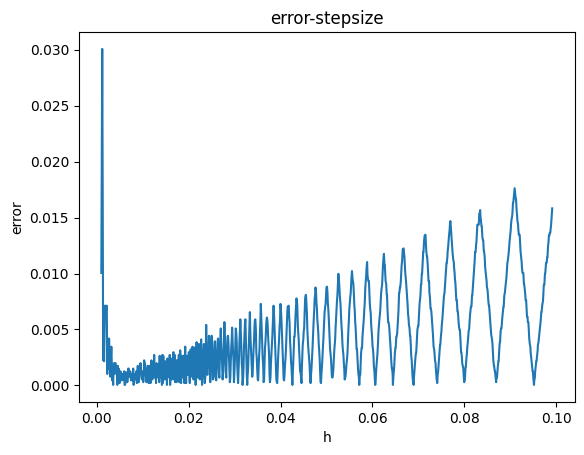

In [1]:
import numpy as np
import matplotlib.pyplot as plt

R = 1
C = 1

def f(x,t):             
    return -x/(R*C)

def euler_step(x_0,h,T_f):
    time = np.arange(0,T_f,h,dtype=np.float16)
    N=len(time)
    x_arr = np.zeros(N,dtype=np.float16)
    x = np.float16(x_0)
    for n in range(N):
        x_arr[n] = x
        x += np.float16(f(x,1)*h)   
    return x_arr,time
    

def analetic_solve(x_0,t):
    return(x_0*np.exp(-t/(R*C)))



T_f=1
x_0=1.

h=np.arange(0.001,0.1,0.0001,dtype=np.float16)
error_arr=np.zeros(len(h),dtype=np.float16)
for i in range(len(h)):
    x,t=euler_step(x_0,h[i],T_f)
    error_arr[i]=abs(x[-1]-analetic_solve(x_0,T_f))

print(h[np.argmin((error_arr))])
plt.plot(h,error_arr,markersize=1)
plt.title('error-stepsize')
plt.xlabel('h')
plt.ylabel('error')
plt.show()
    




2. Instability of algorithms

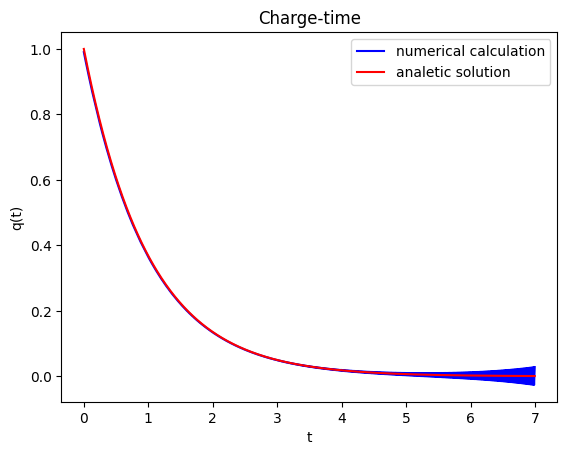

In [2]:
import numpy as np
import matplotlib.pyplot as plt

R = 1
C = 1


def f(x):             # dx/dt = f(x,t)
    return -x/(R*C)


def numeric_step(x_0,h,T_f):
    time = np.arange(0,T_f,h)
    x = x_0
    x_pp = x_0-f(x)*h
    x_p = x_0
    N = len(time)
    x_arr = np.zeros(N,dtype=np.float16)
    for n in range(N):
        x = x_pp+2*h*f(x)
        x_pp = x_p
        x_p = x  
        x_arr[n] = x
    return x_arr,time

def analetic_solve(x_0,t):
    return(x_0*np.exp(-t/(R*C)))

T_f = 7
x_0 = 1.
h=0.01
x,t = numeric_step(x_0,h,T_f)
plt.plot(t,x,'b',label='numerical calculation')
plt.plot(t,analetic_solve(x_0,t),'r',label='analetic solution')
plt.title('Charge-time')
plt.xlabel('t')
plt.ylabel('q(t)')
plt.legend()
plt.show()

3. Comparing different algorithms for harmonic oscillator problem

  3.1 displacement over time

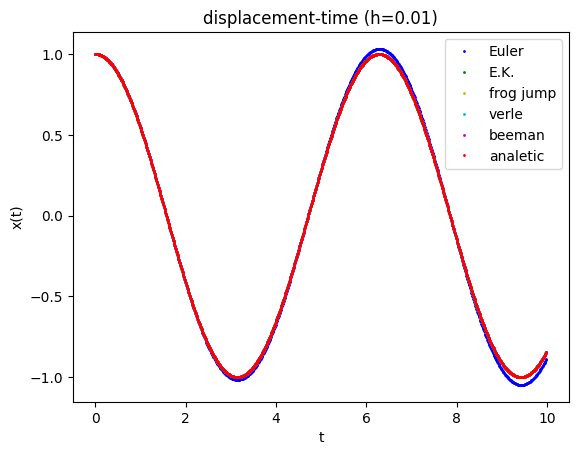

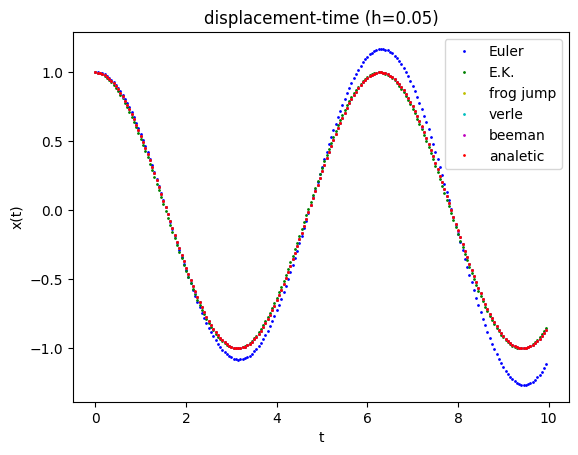

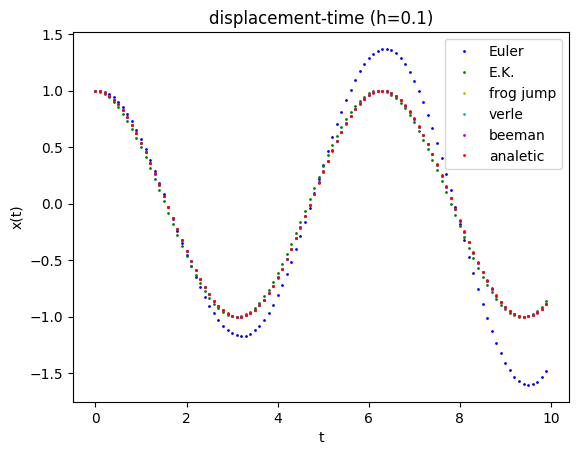

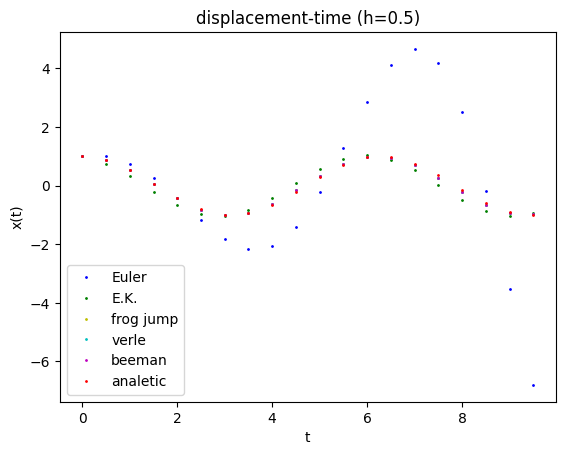

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def E(x,v):
    E = 0.5*(v**2+x**2)
    return(E)


def eulerK_step(x_0,v_0,h,T_f):
    time = np.arange(0,T_f,h)
    N=len(time)
    x_arr = np.zeros(N)
    v_arr = np.zeros(N)
    E_arr = np.zeros(N)
    x = x_0
    v = v_0
    for n in range(N):
        x_arr[n] = x
        v_arr[n] = v
        E_arr[n] = E(x,v)
        v += (-x)*h 
        x += v*h   
    return x_arr,v_arr,time,E_arr

def euler_step(x_0,v_0,h,T_f):
    time = np.arange(0,T_f,h)
    N=len(time)
    x_arr = np.zeros(N)
    v_arr = np.zeros(N)
    E_arr = np.zeros(N)
    x = x_0
    v = v_0
    x_tmp = x_0
    for n in range(N):
        x_arr[n] = x
        v_arr[n] = v
        E_arr[n] = E(x,v)
        x += v*h  
        v += f(x_tmp)*h  
        x_tmp = x  
    return x_arr,v_arr,time,E_arr

def frog(x_0,v_0,h,T_f):
    time = np.arange(0,T_f,h)
    N=len(time)
    x_arr = np.zeros(N)
    v_arr = np.zeros(N)
    E_arr = np.zeros(N)
    v_i = v_0+0.5*h*(-x_0)
    x = x_0
    v = v_i
    for n in range(N):
        x_arr[n] = x
        v_arr[n] = v
        E_arr[n] = E(x,v)
        x += v*h
        v += f(x)*h
    return x_arr,v_arr,time,E_arr

def vele(x_0,v_0,h,T_f):
    time = np.arange(0,T_f,h)
    N=len(time)
    x_arr = np.zeros(N)
    v_arr = np.zeros(N)
    E_arr = np.zeros(N)
    x = x_0
    v = v_0
    x_tmp = x_0
    for n in range(N):
        x_arr[n] = x
        v_arr[n] = v
        E_arr[n] = E(x,v)
        x += v*h+0.5*(-x_tmp)*h**2
        v += 0.5*h*((-x)+(-x_tmp))
        x_tmp = x
    return x_arr,v_arr,time,E_arr

def beeman(x_0,v_0,h,T_f):
    time = np.arange(0,T_f,h)
    N=len(time)
    x_arr = np.zeros(N)
    v_arr = np.zeros(N)
    E_arr = np.zeros(N)
    x = x_0
    v = v_0
    x_tmp1 = x_0
    x_tmp2 = x_0-v_0*h
    for n in range(N):
        x_arr[n] = x
        v_arr[n] = v
        E_arr[n] = E(x,v)
        x += v*h+(1/6)*(4*(-x)-(-x_tmp2))*h**2
        v += (1/6)*h*(2*(-x)+5*(-x_tmp1)-(-x_tmp2))
        x_tmp2 = x_tmp1
        x_tmp1=x
    return x_arr,v_arr,time,E_arr

def analetic_solve(x_0,v_0,t):
    return(x_0*np.cos(t)+v_0*np.sin(t))


T_f = 10
x_0 = 1.
v_0 = 0.
h_list = [0.01 , 0.05 , 0.1 , 0.5]

for h in h_list:
  xe,ve,t,Ee=euler_step(x_0,v_0,h,T_f)
  xk,vk,t,Ek=eulerK_step(x_0,v_0,h,T_f)
  xf,vf,t,Ef=frog(x_0,v_0,h,T_f)
  xv,vv,t,Ev=vele(x_0,v_0,h,T_f)
  xb,vb,t,Eb=beeman(x_0,v_0,h,T_f)

  plt.plot(t,xe,'bo',markersize=1,label='Euler')
  plt.plot(t,xk,'go',markersize=1,label='E.K.')
  plt.plot(t,xf,'yo',markersize=1,label='frog jump')
  plt.plot(t,xv,'co',markersize=1,label='verle')
  plt.plot(t,xb,'mo',markersize=1,label='beeman')
  plt.plot(t,analetic_solve(x_0,v_0,t),'ro',markersize=1,label='analetic')
  plt.xlabel('t')
  plt.ylabel('x(t)')
  plt.title('displacement-time (h=%s)'%h)
  plt.legend()
  plt.show()





3.2 phase plane

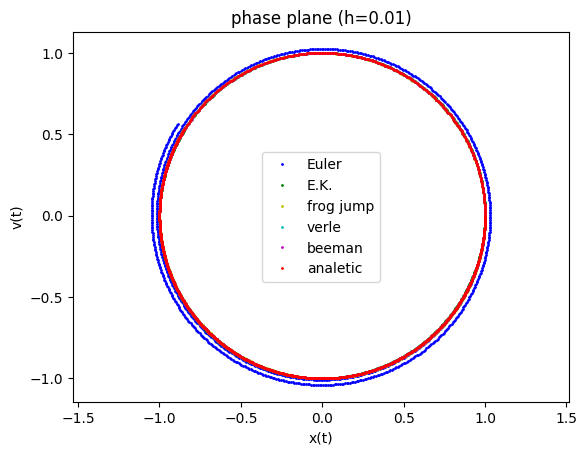

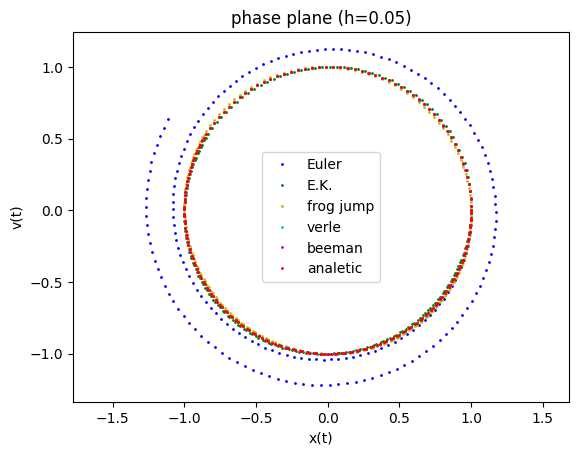

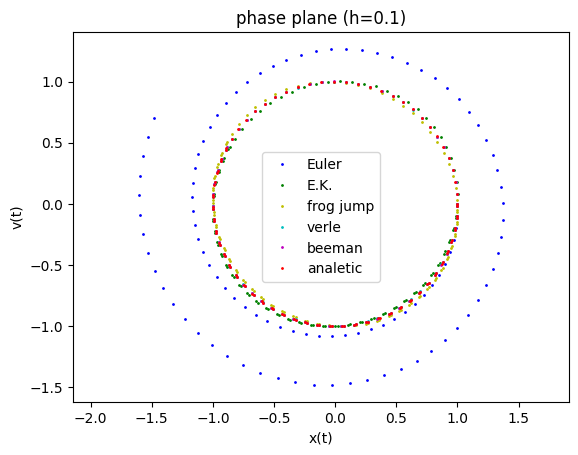

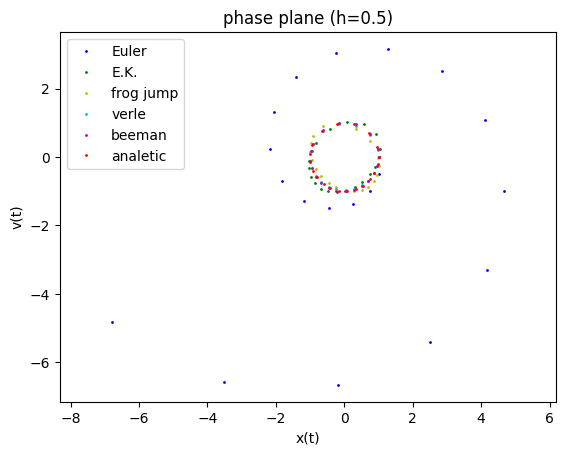

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def E(x,v):
    E = 0.5*(v**2+x**2)
    return(E)


def eulerK_step(x_0,v_0,h,T_f):
    time = np.arange(0,T_f,h)
    N=len(time)
    x_arr = np.zeros(N)
    v_arr = np.zeros(N)
    E_arr = np.zeros(N)
    x = x_0
    v = v_0
    for n in range(N):
        x_arr[n] = x
        v_arr[n] = v
        E_arr[n] = E(x,v)
        v += (-x)*h 
        x += v*h   
    return x_arr,v_arr,time,E_arr

def euler_step(x_0,v_0,h,T_f):
    time = np.arange(0,T_f,h)
    N=len(time)
    x_arr = np.zeros(N)
    v_arr = np.zeros(N)
    E_arr = np.zeros(N)
    x = x_0
    v = v_0
    x_tmp = x_0
    for n in range(N):
        x_arr[n] = x
        v_arr[n] = v
        E_arr[n] = E(x,v)
        x += v*h  
        v += f(x_tmp)*h  
        x_tmp = x  
    return x_arr,v_arr,time,E_arr

def frog(x_0,v_0,h,T_f):
    time = np.arange(0,T_f,h)
    N=len(time)
    x_arr = np.zeros(N)
    v_arr = np.zeros(N)
    E_arr = np.zeros(N)
    v_i = v_0+0.5*h*(-x_0)
    x = x_0
    v = v_i
    for n in range(N):
        x_arr[n] = x
        v_arr[n] = v
        E_arr[n] = E(x,v)
        x += v*h
        v += f(x)*h
    return x_arr,v_arr,time,E_arr

def vele(x_0,v_0,h,T_f):
    time = np.arange(0,T_f,h)
    N=len(time)
    x_arr = np.zeros(N)
    v_arr = np.zeros(N)
    E_arr = np.zeros(N)
    x = x_0
    v = v_0
    x_tmp = x_0
    for n in range(N):
        x_arr[n] = x
        v_arr[n] = v
        E_arr[n] = E(x,v)
        x += v*h+0.5*(-x_tmp)*h**2
        v += 0.5*h*((-x)+(-x_tmp))
        x_tmp = x
    return x_arr,v_arr,time,E_arr

def beeman(x_0,v_0,h,T_f):
    time = np.arange(0,T_f,h)
    N=len(time)
    x_arr = np.zeros(N)
    v_arr = np.zeros(N)
    E_arr = np.zeros(N)
    x = x_0
    v = v_0
    x_tmp1 = x_0
    x_tmp2 = x_0-v_0*h
    for n in range(N):
        x_arr[n] = x
        v_arr[n] = v
        E_arr[n] = E(x,v)
        x += v*h+(1/6)*(4*(-x)-(-x_tmp2))*h**2
        v += (1/6)*h*(2*(-x)+5*(-x_tmp1)-(-x_tmp2))
        x_tmp2 = x_tmp1
        x_tmp1=x
    return x_arr,v_arr,time,E_arr

def analetic_solve(x_0,v_0,t):
    return(x_0*np.cos(t)+v_0*np.sin(t))


T_f = 10
x_0 = 1.
v_0 = 0.
h_list = [0.01 , 0.05 , 0.1 , 0.5]

for h in h_list:
  xe,ve,t,Ee=euler_step(x_0,v_0,h,T_f)
  xk,vk,t,Ek=eulerK_step(x_0,v_0,h,T_f)
  xf,vf,t,Ef=frog(x_0,v_0,h,T_f)
  xv,vv,t,Ev=vele(x_0,v_0,h,T_f)
  xb,vb,t,Eb=beeman(x_0,v_0,h,T_f)

  plt.plot(xe,ve,'bo',markersize=1,label='Euler')
  plt.plot(xk,vk,'go',markersize=1,label='E.K.')
  plt.plot(xf,vf,'yo',markersize=1,label='frog jump')
  plt.plot(xv,vv,'co',markersize=1,label='verle')
  plt.plot(xb,vb,'mo',markersize=1,label='beeman')
  plt.plot(x_0*np.cos(t)+v_0*np.sin(t),-x_0*np.sin(t)+v_0*np.cos(t),'ro',markersize=1,label='analetic')
  plt.xlabel('x(t)')
  plt.ylabel('v(t)')
  plt.title('phase plane (h=%s)'%h)
  plt.legend()
  plt.axis('equal') 
  plt.show()



3.3 conservation of energy

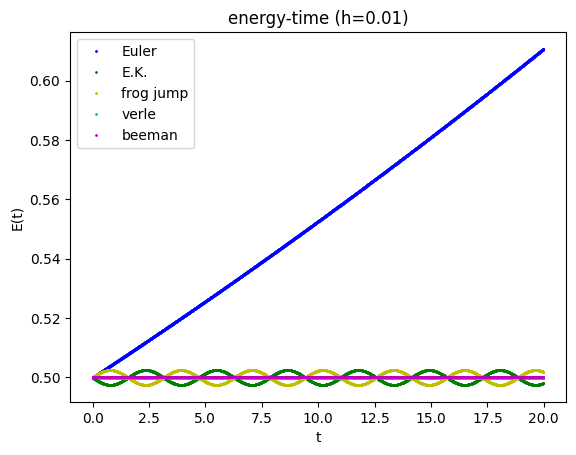

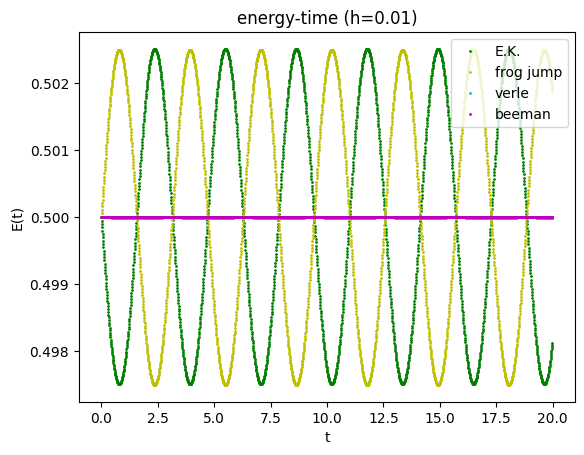

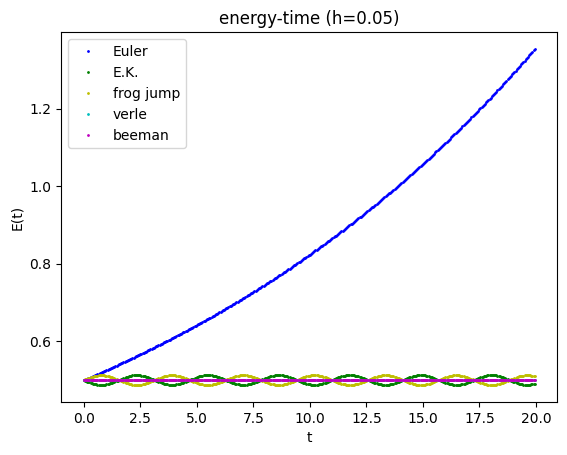

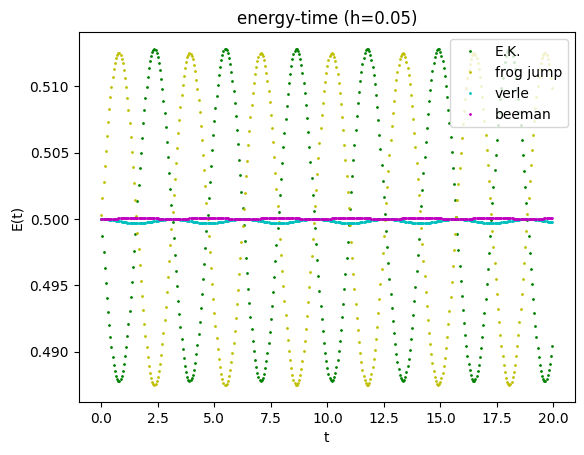

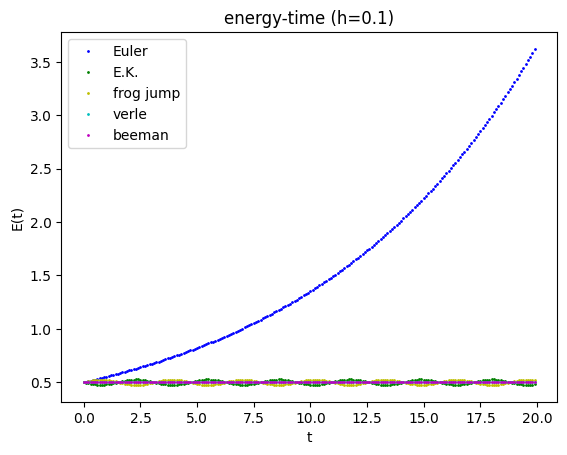

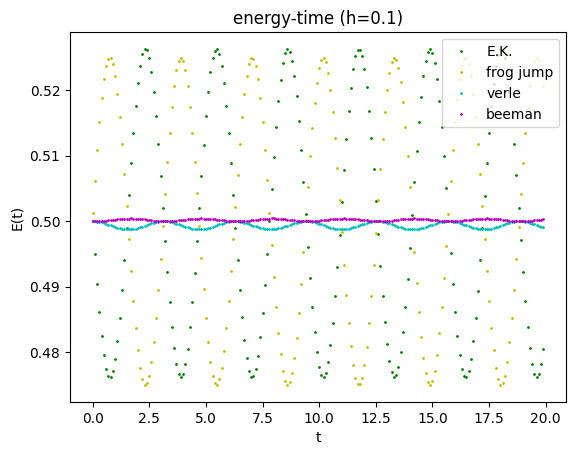

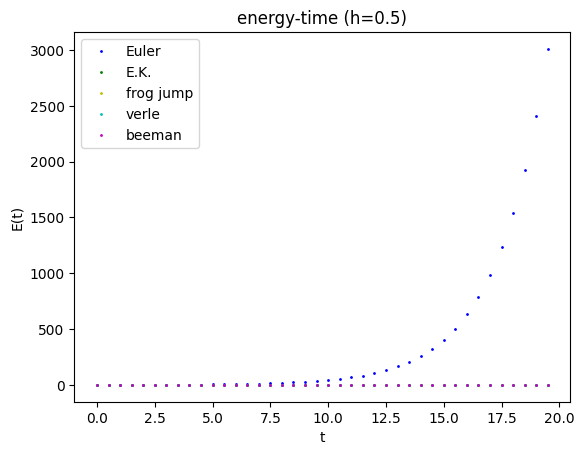

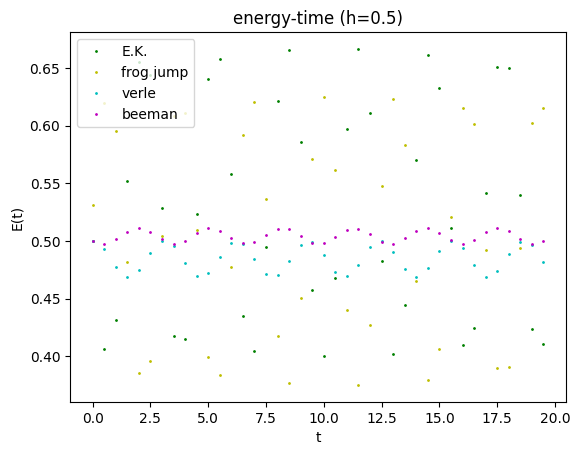

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def E(x,v):
    E = 0.5*(v**2+x**2)
    return(E)


def eulerK_step(x_0,v_0,h,T_f):
    time = np.arange(0,T_f,h)
    N=len(time)
    x_arr = np.zeros(N)
    v_arr = np.zeros(N)
    E_arr = np.zeros(N)
    x = x_0
    v = v_0
    for n in range(N):
        x_arr[n] = x
        v_arr[n] = v
        E_arr[n] = E(x,v)
        v += f(x)*h 
        x += v*h   
    return x_arr,v_arr,time,E_arr

def euler_step(x_0,v_0,h,T_f):
    time = np.arange(0,T_f,h)
    N=len(time)
    x_arr = np.zeros(N)
    v_arr = np.zeros(N)
    E_arr = np.zeros(N)
    x = x_0
    v = v_0
    x_tmp = x_0
    for n in range(N):
        x_arr[n] = x
        v_arr[n] = v
        E_arr[n] = E(x,v)
        x += v*h  
        v += f(x_tmp)*h  
        x_tmp = x  
    return x_arr,v_arr,time,E_arr

def frog(x_0,v_0,h,T_f):
    time = np.arange(0,T_f,h)
    N=len(time)
    x_arr = np.zeros(N)
    v_arr = np.zeros(N)
    E_arr = np.zeros(N)
    v_i = v_0+0.5*h*(-x_0)
    x = x_0
    v = v_i
    for n in range(N):
        x_arr[n] = x
        v_arr[n] = v
        E_arr[n] = E(x,v)
        x += v*h
        v += f(x)*h
    return x_arr,v_arr,time,E_arr

def vele(x_0,v_0,h,T_f):
    time = np.arange(0,T_f,h)
    N=len(time)
    x_arr = np.zeros(N)
    v_arr = np.zeros(N)
    E_arr = np.zeros(N)
    x = x_0
    v = v_0
    x_tmp = x_0
    for n in range(N):
        x_arr[n] = x
        v_arr[n] = v
        E_arr[n] = E(x,v)
        x += v*h+0.5*(-x_tmp)*h**2
        v += 0.5*h*((-x)+(-x_tmp))
        x_tmp = x
    return x_arr,v_arr,time,E_arr

def beeman(x_0,v_0,h,T_f):
    time = np.arange(0,T_f,h)
    N=len(time)
    x_arr = np.zeros(N)
    v_arr = np.zeros(N)
    E_arr = np.zeros(N)
    x = x_0
    v = v_0
    x_tmp1 = x_0
    x_tmp2 = x_0-v_0*h
    for n in range(N):
        x_arr[n] = x
        v_arr[n] = v
        E_arr[n] = E(x,v)
        x += v*h+(1/6)*(4*(-x)-(-x_tmp2))*h**2
        v += (1/6)*h*(2*(-x)+5*(-x_tmp1)-(-x_tmp2))
        x_tmp2 = x_tmp1
        x_tmp1=x
    return x_arr,v_arr,time,E_arr

def analetic_solve(x_0,v_0,t):
    return(x_0*np.cos(t)+v_0*np.sin(t))

T_f = 20
x_0 = 1.
v_0 = 0.
h_list = [0.01 , 0.05 , 0.1 , 0.5]

for h in h_list:
  xe,ve,t,Ee=euler_step(x_0,v_0,h,T_f)
  xk,vk,t,Ek=eulerK_step(x_0,v_0,h,T_f)
  xf,vf,t,Ef=frog(x_0,v_0,h,T_f)
  xv,vv,t,Ev=vele(x_0,v_0,h,T_f)
  xb,vb,t,Eb=beeman(x_0,v_0,h,T_f)

  plt.plot(t,Ee,'bo',markersize=1,label='Euler')
  plt.plot(t,Ek,'go',markersize=1,label='E.K.')
  plt.plot(t,Ef,'yo',markersize=1,label='frog jump')
  plt.plot(t,Ev,'co',markersize=1,label='verle')
  plt.plot(t,Eb,'mo',markersize=1,label='beeman')
  plt.xlabel('t')
  plt.ylabel('E(t)')
  plt.title('energy-time (h=%s)'%h)
  plt.legend()
  plt.show()


  plt.plot(t,Ek,'go',markersize=1,label='E.K.')
  plt.plot(t,Ef,'yo',markersize=1,label='frog jump')
  plt.plot(t,Ev,'co',markersize=1,label='verle')
  plt.plot(t,Eb,'mo',markersize=1,label='beeman')
  plt.xlabel('t')
  plt.ylabel('E(t)')
  plt.title('energy-time (h=%s)'%h)
  plt.legend()
  plt.show()

